## Actualización valores Refinitiv

In [1]:
# import subprocess
# import time
# import pyautogui
# import openpyxl

# # Ruta del archivo Excel
# archivo_excel = r"C:\Users\Carmen (TFG)\Documents\Bases de datos\Base1.xlsm"

# # Nombre de la hoja en la que deseas realizar las operaciones
# nombre_hoja = 'BaseLimpia'

# # Abre el archivo Excel
# subprocess.Popen(['start', 'excel', archivo_excel], shell=True)

# # Espera 10 segundos
# time.sleep(10)

# # Abre el archivo Excel usando openpyxl
# workbook = openpyxl.load_workbook(archivo_excel)

# # Selecciona la hoja específica
# hoja = workbook[nombre_hoja]

# # Simula la tecla F9
# pyautogui.press('f9')

# # Espera 3 minutos
# time.sleep(180)

# # Simula Ctrl+G para guardar
# pyautogui.hotkey('ctrl', 'g')

# # Espera 10 segundos
# time.sleep(10)

# # Simula Alt+F4 para cerrar cualquier instancia adicional de Excel
# pyautogui.hotkey('alt', 'f4')

## Tratamiento datos

### Importar librerias

In [2]:
import pandas as pd
import numpy as np
import eikon as ek
import matplotlib.pyplot as plt
import seaborn as sns

### Carga dataframe

In [3]:
data = pd.read_excel(r"C:\Users\Carmen (TFG)\Documents\Bases de datos\Base1.xlsm", sheet_name = 'BaseLimpia', header = 1)

In [4]:
# Eliminamos filas con valores nulos 
data_filtrada = data.dropna(subset=['RIC'])
data_filtrada = data_filtrada.dropna(subset=['Nombre'])

data_filtrada['Categoria'].fillna('No Registrado', inplace=True)

data_filtrada['Ratio de Sostenibilidad'] = data_filtrada['Ratio de Sostenibilidad'].astype(str).replace(r'\.0$', '', regex=True)
data_filtrada.loc[data_filtrada['Ratio de Sostenibilidad'] == 'nan', 'Ratio de Sostenibilidad'] = 'No Registrado'

data_filtrada['Responsible Investments'].fillna('No', inplace=True)

data_filtrada['Total Return Lipper Rating'].fillna('No Registrado', inplace=True)

data_filtrada['MiFID II Fund Name'] = data_filtrada['MiFID II Fund Name'].apply(lambda x: 'Si' if not pd.isna(x) else 'No')

patron_a_reemplazar = 'Unable to collect'
nuevo_valor = 'No Registrado'
mask = data_filtrada['Responsible Investments'].str.contains(patron_a_reemplazar) | \
       data_filtrada['Total Return Lipper Rating'].str.contains(patron_a_reemplazar) | \
       data_filtrada['MiFID II Fund Name'].str.contains(patron_a_reemplazar) | \
       data_filtrada['Launch Date'].str.contains(patron_a_reemplazar)
columnas_a_actualizar = ['Responsible Investments', 'Total Return Lipper Rating', 'MiFID II Fund Name', 'Launch Date']
data_filtrada.loc[mask, columnas_a_actualizar] = nuevo_valor

columnas = [
    'NAV',
    'Total Net Assets',
    'Year-to-Date Performance',
    '6 Month Performance to Last Month End',
    '1 Year Performance to Last Month End',
    '3 Year Performance to Last Month End',
    '5 Year Performance to Last Month End',
    '10 Year Performance to Last Month End',
    'Standard Deviation for 1 Year to Last Month End',
    'Standard Deviation for 3 Years to Last Month End',
    'Standard Deviation for 5 Years to Last Month End',
    'Max Drawdown for 1 Year to Last Month End',
    'Max Drawdown for 3 Years to Last Month End',
    'Max Drawdown for 5 Years to Last Month End',
    'Alpha for 1 Year to Last Month End',
    'Alpha for 3 Years to Last Month End',
    'Alpha for 5 Years to Last Month End',
    'Beta for 1 Year to Last Month End',
    'Beta for 3 Years to Last Month End',
    'Beta for 5 Years to Last Month End',
    'Sharpe Ratio for 1 Year to Last Month End',
    'Sharpe Ratio for 3 Years to Last Month End',
    'Sharpe Ratio for 5 Years to Last Month End',
    'R-Squared for 1 Year to Last Month End',
    'R-Squared for 3 Years to Last Month End',
    'R-Squared for 5 Years to Last Month End',
    'Tracking Error for 1 Year to Last Month End',
    'Tracking Error for 3 Years to Last Month End',
    'Tracking Error for 5 Years to Last Month End',
    'Correlation for 1 Year to Last Month End',
    'Correlation for 3 Years to Last Month End',
    'Correlation for 5 Years to Last Month End',
    'Information Ratio for 1 Year to Last Month End',
    'Information Ratio for 3 Years to Last Month End',
    'Information Ratio for 5 Years to Last Month End',
    'Minimum Initial Investment', 
    'Current Initial Charge',
    'Current Redemption Charge', 
    'Total Expense Ratio'
]

# Columnas a numéricas, maneja valores no numéricos convirtiéndolos a NaN
data_filtrada[columnas] = data_filtrada[columnas].apply(pd.to_numeric, errors='coerce')

data_filtrada.insert(10, 'SRRI', data_filtrada['Standard Deviation for 1 Year to Last Month End'].apply(lambda x: 1 if 0 <= x < 0.5 else (2 if 0.5 <= x < 2 else (3 if 2 <= x < 5 else (4 if 5 <= x < 10 else (5 if 10 <= x < 15 else (6 if 15 <= x < 25 else 7)))))))
data_filtrada.insert(11, 'Categoria del riesgo', data_filtrada['Standard Deviation for 1 Year to Last Month End'].apply(lambda x: 'Bajo' if 0 <= x < 2 else ('Medio' if 2 <= x < 15 else 'Alto')))

# Cambiamos nombres de las columnas
data_filtrada.rename(columns={'Resposible Investments': 'Fondo sostenible',
                              'Total Return Lipper Rating': 'Valoracion Lipper',
                              'MiFID II Fund Name': 'MiFID II',
                              'Launch Date': 'Fecha creacion',
                              'NAV': 'Valor Liquidativo',
                              'Total Net Assets': 'Patrimonio',
                              'Year-to-Date Performance': 'Rentabilidad YTD',
                              '6 Month Performance to Last Month End': 'Rentabilidad 6 Meses',
                              '1 Year Performance to Last Month End': 'Rentabilidad 1 Year',
                              '3 Year Performance to Last Month End': 'Rentabilidad 3 Year',
                              '5 Year Performance to Last Month End': 'Rentabilidad 5 Year',
                              '10 Year Performance to Last Month End': 'Rentabilidad 10 Year',
                              'Standard Deviation for 1 Year to Last Month End': 'Volatilidad 1 Year',
                              'Standard Deviation for 3 Years to Last Month End': 'Volatilidad 3 Year',
                              'Standard Deviation for 5 Years to Last Month End': 'Volatilidad 5 Year',
                              'Max Drawdown for 1 Year to Last Month End': 'Maxima caida 1 Year',
                              'Max Drawdown for 3 Years to Last Month End': 'Maxima caida 3 Year',
                              'Max Drawdown for 5 Years to Last Month End': 'Maxima caida 5 Year',
                              'Alpha for 1 Year to Last Month End': 'Alpha 1 Year',
                              'Alpha for 3 Years to Last Month End': 'Alpha 3 Year',
                              'Alpha for 5 Years to Last Month End': 'Alpha 5 Year',
                              'Beta for 1 Year to Last Month End': 'Beta 1 Year',
                              'Beta for 3 Years to Last Month End': 'Beta 3 Year',
                              'Beta for 5 Years to Last Month End': 'Beta 5 Year',
                              'Sharpe Ratio for 1 Year to Last Month End': 'Sharpe Ratio 1 Year',
                              'Sharpe Ratio for 3 Years to Last Month End': 'Sharpe Ratio 3 Year',
                              'Sharpe Ratio for 5 Years to Last Month End': 'Sharpe Ratio 5 Year',
                              'R-Squared for 1 Year to Last Month End': 'R^2 1 Year',
                              'R-Squared for 3 Years to Last Month End': 'R^2 3 Year',
                              'R-Squared for 5 Years to Last Month End': 'R^2 5 Year',
                              'Tracking Error for 1 Year to Last Month End': 'Tracking Error 1 Year',
                              'Tracking Error for 3 Years to Last Month End': 'Tracking Error 3 Year',
                              'Tracking Error for 5 Years to Last Month End': 'Tracking Error 5 Year',
                              'Correlation for 1 Year to Last Month End': 'Correlacion 1 Year',
                              'Correlation for 3 Years to Last Month End': 'Correlacion 3 Year',
                              'Correlation for 5 Years to Last Month End': 'Correlacion 5 Year',
                              'Information Ratio for 1 Year to Last Month End': 'Information Ratio 1 Year',
                              'Information Ratio for 3 Years to Last Month End': 'Information Ratio 3 Year',
                              'Information Ratio for 5 Years to Last Month End': 'Information Ratio 5 Year',
                              'Minimum Initial Investment':'Inversion Minima',
                              'Current Initial Charge': 'Comision de Gestion',
                              'Current Redemption Charge': 'Comision de Reembolso',
                              'Total Expense Ratio': 'Gastos Corrientes'
                             }, inplace=True)

### Guardar dataframe en un csv

In [5]:
data_filtrada.to_csv(r'C:\Users\Carmen (TFG)\Documents\Bases de datos\Base_Final.csv', index=False)

## Descripción general

### Info DataFrame

In [6]:
num_filas, num_columnas = data_filtrada.shape
print(f'Número de observaciones: {num_filas}')
print(f'Número de variables: {num_columnas}')

Número de observaciones: 2836
Número de variables: 52


In [7]:
info_tipos_de_datos = pd.DataFrame({
    'Tipo de Dato': data_filtrada.dtypes,
    'Formato': [type(data_filtrada[col][0]).__name__ for col in data_filtrada.columns]
})

print('\nInformación de Tipos de Datos:')
info_tipos_de_datos


Información de Tipos de Datos:


,Tipo de Dato,Formato
ISIN,object,str
RIC,object,str
Nombre,object,str
Gestora,object,str
Moneda,object,str
Categoria,object,str
Ratio de Sostenibilidad,object,str
Responsible Investments,object,str
Valoracion Lipper,object,int
MiFID II,object,str


### Medidas

#### Tendencia Central

In [8]:
variables_interes = ['SRRI', 'Valor Liquidativo', 'Patrimonio', 'Rentabilidad YTD', 'Volatilidad 1 Year', 'R^2 1 Year']

for variable in variables_interes:
    # Media
    media = data_filtrada[variable].mean()

    # Mediana
    mediana = data_filtrada[variable].median()

    # Moda
    moda = data_filtrada[variable].mode().iloc[0]

    print(f"\nMedidas de tendencia central para {variable}:")
    print("Media:", media)
    print("Mediana:", mediana)
    print("Moda:", moda)


Medidas de tendencia central para SRRI:
Media: 3.89033850493653
Mediana: 4.0
Moda: 3

Medidas de tendencia central para Valor Liquidativo:
Media: 130.554439835
Mediana: 12.366
Moda: 6.0776

Medidas de tendencia central para Patrimonio:
Media: 129690609.47304347
Mediana: 17833186.225
Moda: 0.0

Medidas de tendencia central para Rentabilidad YTD:
Media: 2.8191020007209806
Mediana: 1.80438
Moda: 0.38651

Medidas de tendencia central para Volatilidad 1 Year:
Media: 6.973367710223401
Mediana: 5.6353885
Moda: 2.4757237

Medidas de tendencia central para R^2 1 Year:
Media: 0.6976219172783505
Mediana: 0.8120516
Moda: 0.6881819


#### Dispersión

In [9]:
variables_interes = ['SRRI', 'Valor Liquidativo', 'Patrimonio', 'Rentabilidad YTD', 'Volatilidad 1 Year', 'R^2 1 Year']

for variable in variables_interes:
    # Rango
    rango = data_filtrada[variable].max() - data_filtrada[variable].min()

    # Varianza
    varianza = data_filtrada[variable].var()

    # Desviación Estándar
    desviacion_estandar = data_filtrada[variable].std()

    print(f"\nMedidas de dispersión para {variable}:")
    print("Rango:", rango)
    print("Varianza:", varianza)
    print("Desviación Estándar:", desviacion_estandar)


Medidas de dispersión para SRRI:
Rango: 6
Varianza: 2.341762001776106
Desviación Estándar: 1.5302816739986485

Medidas de dispersión para Valor Liquidativo:
Rango: 12717.461800000001
Varianza: 242333.0902133227
Desviación Estándar: 492.27338970669814

Medidas de dispersión para Patrimonio:
Rango: 8427829665.8
Varianza: 2.0306989712211136e+17
Desviación Estándar: 450632774.1322321

Medidas de dispersión para Rentabilidad YTD:
Rango: 40.228
Varianza: 11.764315731143165
Desviación Estándar: 3.4299148285552463

Medidas de dispersión para Volatilidad 1 Year:
Rango: 44.7507988
Varianza: 28.86385942054544
Desviación Estándar: 5.37250960171738

Medidas de dispersión para R^2 1 Year:
Rango: 0.9999447
Varianza: 0.08099529097581099
Desviación Estándar: 0.28459671638269296


#### Frecuencias

In [10]:
rangos_valor_liquidativo = pd.cut(data_filtrada['Valor Liquidativo'], bins=[0, 50, 500, 1000, 15000], include_lowest=True)
rangos_rentabilidad_ytd = pd.cut(data_filtrada['Rentabilidad YTD'], bins=[-20, 0, 5, 10, 200], include_lowest=True)

# Frecuencia Absoluta 
frecuencia_absoluta_valor_liquidativo = rangos_valor_liquidativo.value_counts().sort_index().fillna(0)
frecuencia_absoluta_rentabilidad_ytd = rangos_rentabilidad_ytd.value_counts().sort_index().fillna(0)

# Frecuencia Relativa
frecuencia_relativa_valor_liquidativo = frecuencia_absoluta_valor_liquidativo / len(data_filtrada)
frecuencia_relativa_rentabilidad_ytd = frecuencia_absoluta_rentabilidad_ytd / len(data_filtrada)

print("\nMedidas de frecuencias para Valor Liquidativo:")
print("Frecuencia Absoluta por Rangos:")
print(frecuencia_absoluta_valor_liquidativo)
print("\nFrecuencia Relativa por Rangos:")
print(frecuencia_relativa_valor_liquidativo)

print("\nMedidas de frecuencias para Rentabilidad YTD:")
print("Frecuencia Absoluta por Rangos:")
print(frecuencia_absoluta_rentabilidad_ytd)
print("\nFrecuencia Relativa por Rangos:")
print(frecuencia_relativa_rentabilidad_ytd)


Medidas de frecuencias para Valor Liquidativo:
Frecuencia Absoluta por Rangos:
Valor Liquidativo
(-0.001, 50.0]       1971
(50.0, 500.0]         636
(500.0, 1000.0]        70
(1000.0, 15000.0]     103
Name: count, dtype: int64

Frecuencia Relativa por Rangos:
Valor Liquidativo
(-0.001, 50.0]       0.694993
(50.0, 500.0]        0.224260
(500.0, 1000.0]      0.024683
(1000.0, 15000.0]    0.036319
Name: count, dtype: float64

Medidas de frecuencias para Rentabilidad YTD:
Frecuencia Absoluta por Rangos:
Rentabilidad YTD
(-20.001, 0.0]     388
(0.0, 5.0]        1746
(5.0, 10.0]        542
(10.0, 200.0]       98
Name: count, dtype: int64

Frecuencia Relativa por Rangos:
Rentabilidad YTD
(-20.001, 0.0]    0.136812
(0.0, 5.0]        0.615656
(5.0, 10.0]       0.191114
(10.0, 200.0]     0.034556
Name: count, dtype: float64


### Gráficos

#### Histogramas y Diagramas de Densidad

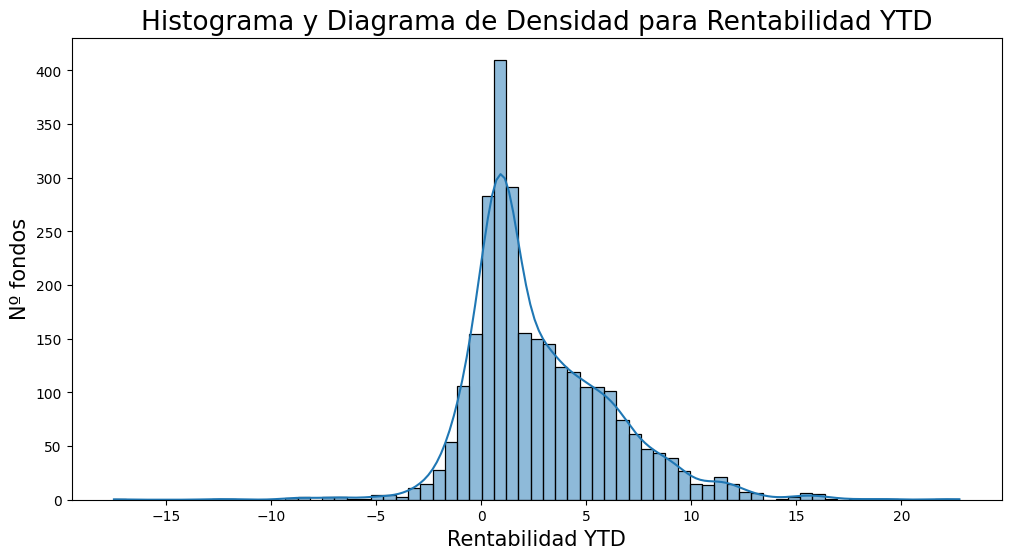

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data_filtrada['Rentabilidad YTD'], kde=True)
plt.title('Histograma y Diagrama de Densidad para Rentabilidad YTD', fontsize = 19)
plt.xlabel('Rentabilidad YTD', fontsize = 15)
plt.ylabel('Nº fondos', fontsize = 15)
plt.show()

#### Diagrama de dispersión

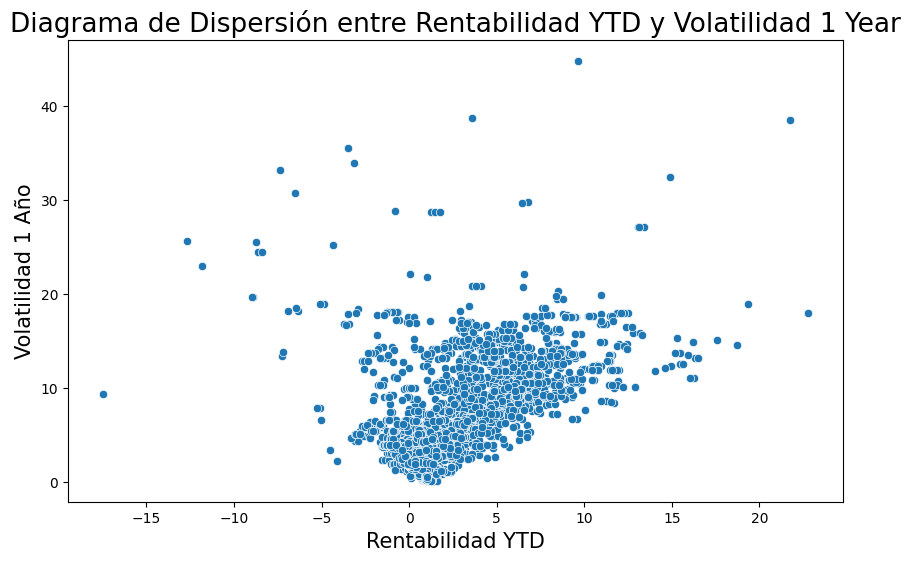

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rentabilidad YTD', y='Volatilidad 1 Year', data=data_filtrada)
plt.title('Diagrama de Dispersión entre Rentabilidad YTD y Volatilidad 1 Year', fontsize = 19)
plt.xlabel('Rentabilidad YTD', fontsize = 15)
plt.ylabel('Volatilidad 1 Año', fontsize = 15)
plt.show()

#### Diagrama de cajas

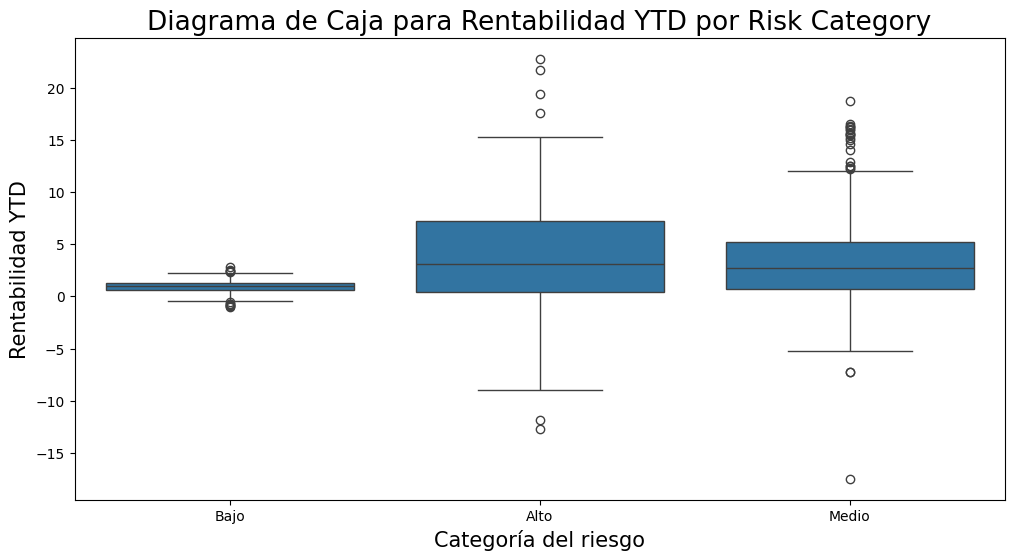

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria del riesgo', y='Rentabilidad YTD', data=data_filtrada)
plt.title('Diagrama de Caja para Rentabilidad YTD por Risk Category', fontsize = 19)
plt.xlabel('Categoría del riesgo', fontsize = 15)
plt.ylabel('Rentabilidad YTD', fontsize = 15)
plt.show()


#### Diagrama de barras

C:\Users\Carmen (TFG)\AppData\Local\Temp\ipykernel_26612\4177413781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Moneda', data=data_filtrada, palette='Set3')


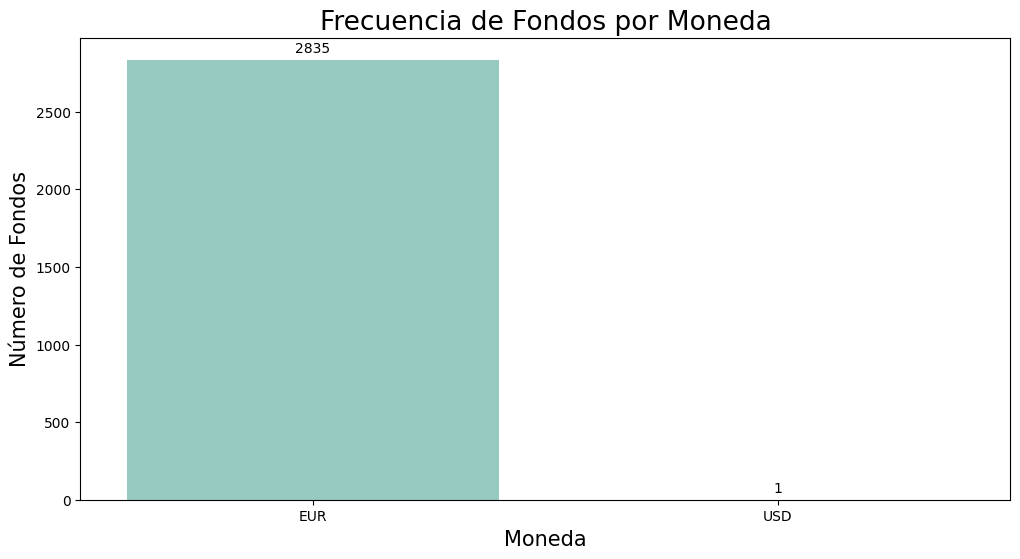

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Moneda', data=data_filtrada, palette='Set3')

# Agregar etiquetas de cuenta encima de las barras (sin decimales)
for p in ax.patches:
    count = int(p.get_height())  # Convertir el valor a entero
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Frecuencia de Fondos por Moneda', fontsize = 19)
plt.xlabel('Moneda',  fontsize = 15)
plt.ylabel('Número de Fondos', fontsize = 15)
plt.show()

C:\Users\Carmen (TFG)\AppData\Local\Temp\ipykernel_26612\747665838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Ratio de Sostenibilidad', data=data_filtrada, order=order, palette='Set2')


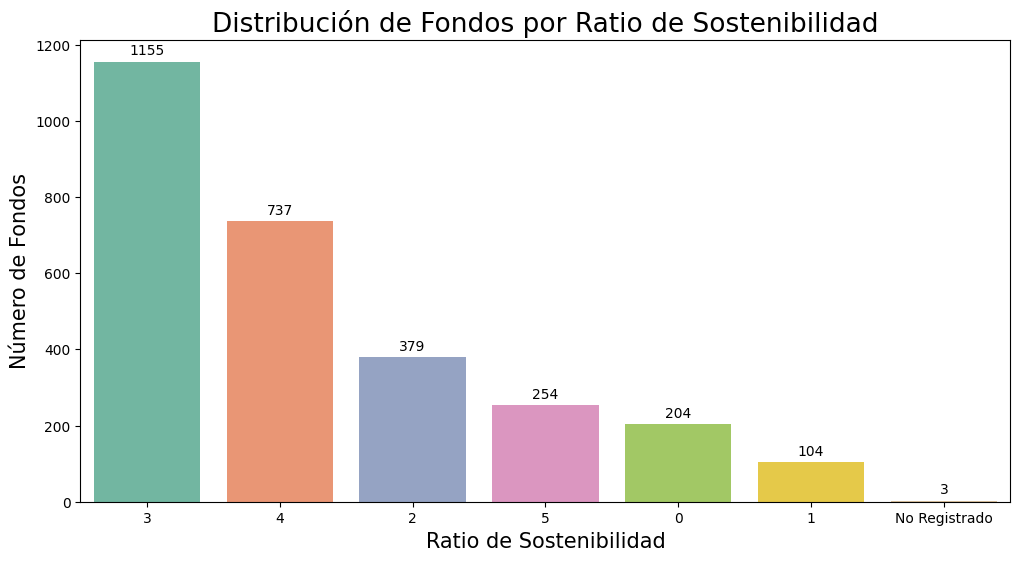

In [15]:
order = data_filtrada['Ratio de Sostenibilidad'].value_counts().index

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Ratio de Sostenibilidad', data=data_filtrada, order=order, palette='Set2')

for p in ax.patches:
    count = int(p.get_height()) 
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribución de Fondos por Ratio de Sostenibilidad', fontsize=19, loc='center')
plt.xlabel('Ratio de Sostenibilidad', fontsize = 15)
plt.ylabel('Número de Fondos', fontsize = 15)
plt.show()

#### Gráficos de tartas

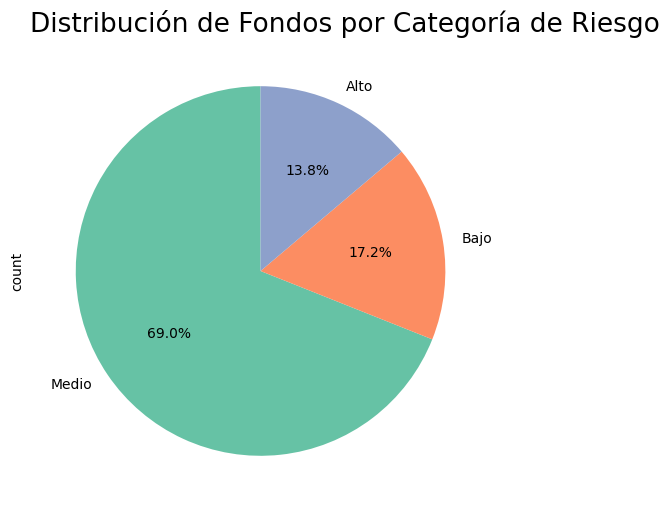

In [16]:
plt.figure(figsize=(12, 6))

data_filtrada['Categoria del riesgo'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribución de Fondos por Categoría de Riesgo', fontsize=19, loc='left')
plt.show()

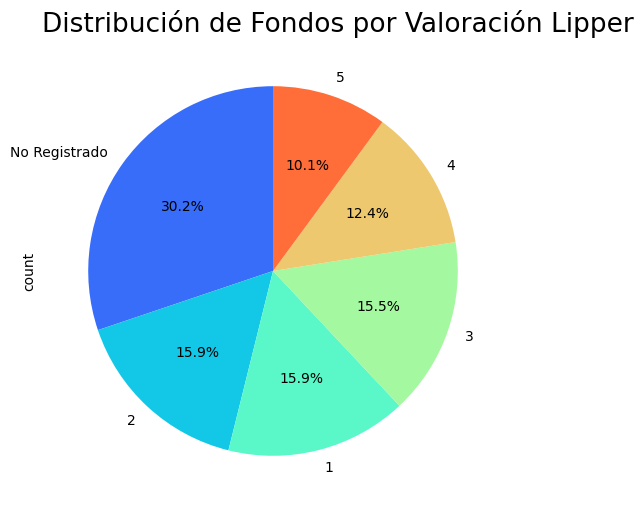

In [17]:
sns.set_palette("rainbow")

plt.figure(figsize=(12, 6))
data_filtrada['Valoracion Lipper'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Distribución de Fondos por Valoración Lipper', fontsize=19, loc='left')
plt.show()

#### Mapa de calor

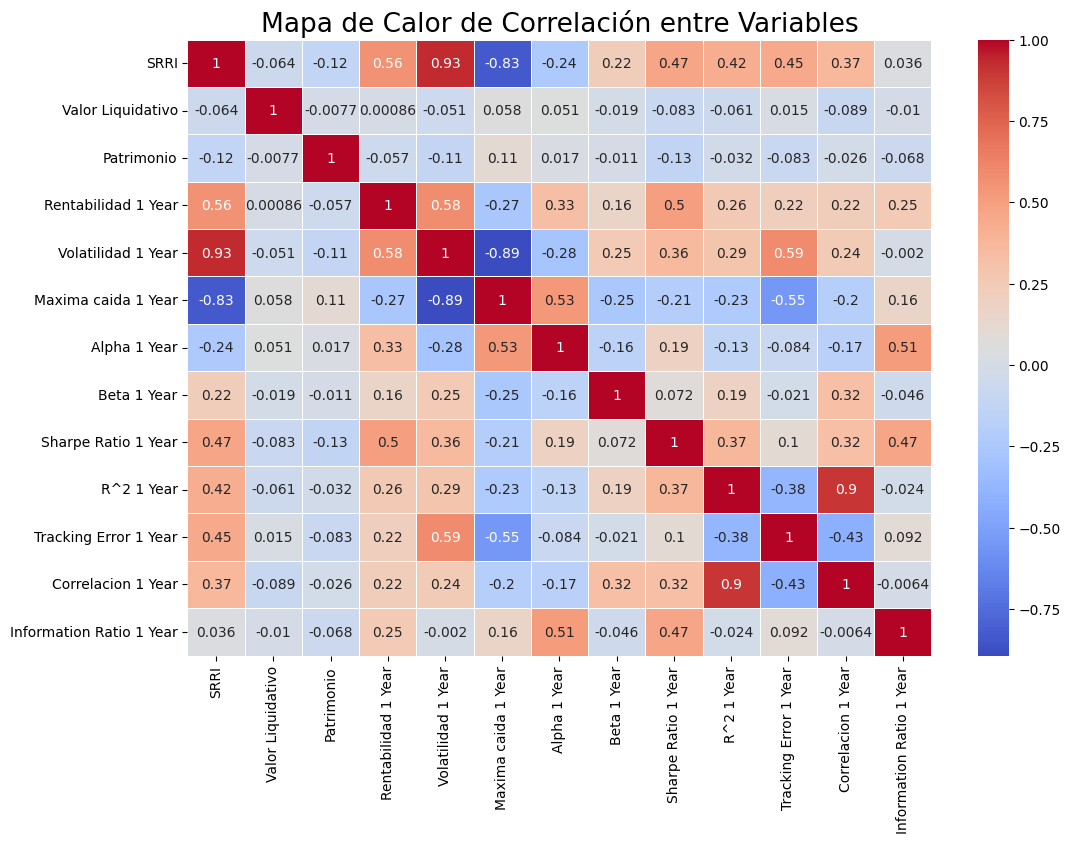

In [18]:
columnas_interes = ['SRRI', 'Valor Liquidativo', 'Patrimonio', 'Rentabilidad 1 Year',
                    'Volatilidad 1 Year', 'Maxima caida 1 Year', 'Alpha 1 Year', 
                    'Beta 1 Year', 'Sharpe Ratio 1 Year', 'R^2 1 Year', 
                    'Tracking Error 1 Year', 'Correlacion 1 Year', 'Information Ratio 1 Year']

numeric_columns = data_filtrada[columnas_interes].select_dtypes(include=['float64', 'int64'])
numeric_columns.replace('No Registrado', np.nan, inplace=True)

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables', fontsize = 19)
plt.show()